# 로지스틱 손실함수(이진 크로스엔트로피 손실 함수)

In [4]:
import pandas as pd
df = pd.read_csv('http://bit.ly/fish_csv_data')

In [5]:
df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [18]:
# 정답과 분류
X = df.iloc[:,1:].to_numpy()
Y = df.iloc[:,0].to_numpy()
print(type(X), type(Y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [19]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [20]:
# 훈련 / 테스트(검증) 세트로 분리
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(X,Y,test_size=0.3,random_state=0)

In [21]:
# 선형모델중에 적합한 모델 선택
# SGDClassifier : 확률적 경사하강법을 적용한 머신러닝
# 확률적 경사하강법 : 학습용데이터가 매번 갱신되는 상황에서 전체데이터를 다 사용하지 않고 확보된 데이터만 가지고 학습이 가능
from sklearn.linear_model import SGDClassifier

In [64]:
# 손실함수로 log를 사용한다는 것은
# 각 클래스를  기준으로 이진분류를 각각 만들어서 합치는 것
# 예를들어 특정 클래스를 양성으로(1)로 만들고 나머지를 모두 0으로 만드는..
# OvR  (One versus Rest)
sc = SGDClassifier(loss="log_loss",max_iter=100,random_state=0)
# 미니배치하고 배치경사는 지원하지 않고.. --> 신경망에서 다룸

In [63]:
# 훈련
sc.fit(x_train,y_train)
# 학습용 / 검증용으로 성능을 출력 --> 과적합
print(sc.score(x_train,y_train))
print(sc.score(x_test,y_test ))

0.8918918918918919
0.8333333333333334


In [60]:
# 점진적인 학습(기존학습 이어서) 1 epoch 부터
sc.partial_fit(x_train,y_train)
print(sc.score(x_train,y_train))
print(sc.score(x_test,y_test ))

0.9459459459459459
0.9166666666666666


In [72]:
# 시각화를 통해 최적의 점진적 학습횟수... 성능을
# 과적합
help(sc.partial_fit)

Help on method partial_fit in module sklearn.linear_model._stochastic_gradient:

partial_fit(X, y, classes=None, sample_weight=None) method of sklearn.linear_model._stochastic_gradient.SGDClassifier instance
    Perform one epoch of stochastic gradient descent on given samples.
    
    Internally, this method uses ``max_iter = 1``. Therefore, it is not
    guaranteed that a minimum of the cost function is reached after calling
    it once. Matters such as objective convergence, early stopping, and
    learning rate adjustments should be handled by the user.
    
    Parameters
    ----------
    X : {array-like, sparse matrix}, shape (n_samples, n_features)
        Subset of the training data.
    
    y : ndarray of shape (n_samples,)
        Subset of the target values.
    
    classes : ndarray of shape (n_classes,), default=None
        Classes across all calls to partial_fit.
        Can be obtained by via `np.unique(y_all)`, where y_all is the
        target vector of the entir

In [110]:
# 학습을 많이하고 모델이 복잡할수록.. 과적합 피할 수 가 없음
# log_loss : 로지스틱 손실함수
import numpy as np
from tqdm import tqdm
sc = SGDClassifier(loss="log_loss",max_iter=100,random_state=0)
sc.fit(x_train,y_train)
train_score,test_score = [],[]
for _ in tqdm(range(100)):
    sc.partial_fit(x_train,y_train,classes = np.unique(y_train))
    train_score.append(sc.score(x_train,y_train))
    test_score.append(sc.score(x_test,y_test ))

100%|███████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 228.83it/s]


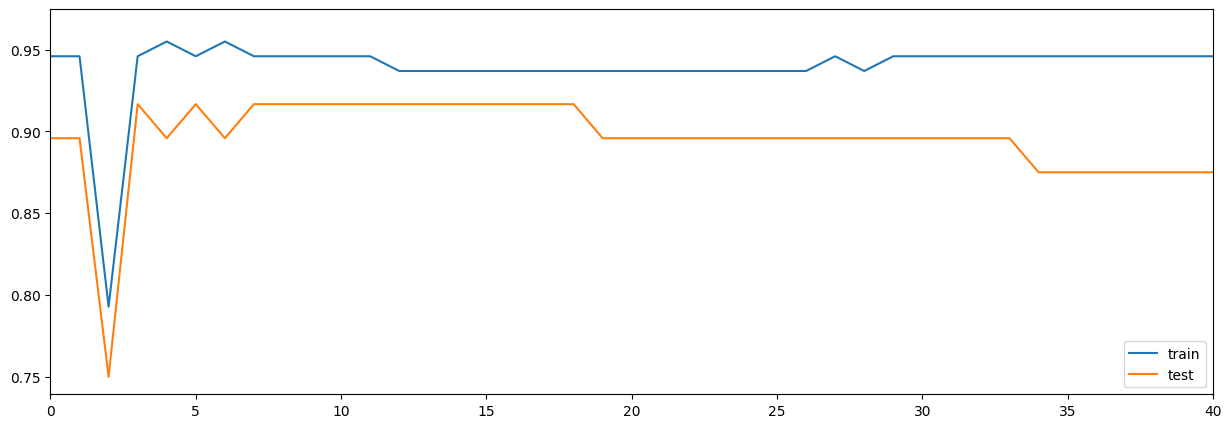

In [113]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(train_score,label='train')
plt.plot(test_score,label='test')
plt.xlim((0,40))
plt.legend()
plt.show()

In [92]:
for _ in tqdm(range(15)):
    sc.partial_fit(x_train,y_train,classes = np.unique(y_train))   

100%|█████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 278.52it/s]


In [93]:
print(sc.score(x_train,y_train))
print(sc.score(x_test,y_test ))

0.9369369369369369
0.9166666666666666


In [94]:
# 더 이상 성능향상이 없으면 자동으로 학습을 중지 - 조기종료
help(SGDClassifier) # tol

Help on class SGDClassifier in module sklearn.linear_model._stochastic_gradient:

class SGDClassifier(BaseSGDClassifier)
 |  SGDClassifier(loss='hinge', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
 |  
 |  Linear classifiers (SVM, logistic regression, etc.) with SGD training.
 |  
 |  This estimator implements regularized linear models with stochastic
 |  gradient descent (SGD) learning: the gradient of the loss is estimated
 |  each sample at a time and the model is updated along the way with a
 |  decreasing strength schedule (aka learning rate). SGD allows minibatch
 |  (online/out-of-core) learning via the `partial_fit` method.
 |  For best results using the default learning rate schedule, the data sho

# 회귀
    KNeighborsRegressor : 거리중심의 이웃한 데이터를 기준
    LinearRegression    : 직선의 방정식    y = ax + b
                          다차원... y = ax2+bx+c  특성공학
                          다항을가지고 다차원.... 피처는 여러개 일수록 좋고... 거기서 특성공학을 통해 새로운 피처를 생산
                          모델이 복잡해 졌음...> 과적합
                          규제... 
                          릿지  : 규제방법으로. 평균의 제곱을 계수로 제공해서.. L2
                          라쏘  : 규제방법으로. 절대값 제곱을 계수로 제공해서.. L1
    Ridge
    Lasso

# 분류
    KNeighborsClassifier
    SGDClassifier        : 확률적 경사 하강법 (랜덤하게 경사가 급한방향으로 내려간다(학습) 에포크, 학습데이터를 한개씩 꺼내서 
                            학습을 하는데.. 전체데이터를 다 쓰는게.. 1 epoch
                            손실함수 : 실제대비 예측한 오차 오류...  로지스틱 손실함수-- log_loss
                            0~1사이의 값을 갖는데. 1에 가까울 수록 성능이 좋다..
                            
    LogisticRegression  : 값을 예측하나. 그 값을 확률로 사용... 로지스틱 함수(시그모이드 함수) 연속인 값으로 0~1사이를 표현
                            해서 임계치인 0.5보다 크면 양성클래서 작으면 음성클래스.. 그래서 이진분류
                            다중은... 각 이진분류를 써서 클래스 갯수만큼 다시 나눈 소프트맥스 함수를 이용
